In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

crime = pd.read_csv('Crimes.csv')
holidays = pd.read_csv('holidays.csv')

weather = pd.read_csv('weather.csv')
moon = pd.read_csv('full_moon.csv')

jobs = pd.read_csv('CHIC917URN.csv')
merged = pd.read_csv('merged3.csv')

In [3]:
crime.columns

# LOCATION OF CRIME
#'Block', 
#'Beat',
#'District',
#'Ward', 
#'Community Area', 
#'Location Description',
#'X Coordinate',
#'Y Coordinate', 
#'Latitude', 
#'Longitude',
#'Location'


# TYPE OF CRIME
#'IUCR', 
#'Primary Type',
#'Description',
#'FBI Code', 
#'Domestic', 


# TIME OF CRIME
#'Date', 
#'Year', 
#'Updated On', 

# UNIQUE IDENTIFIERS
#'ID', 
#'Case Number', 
#'Arrest', 


crime_new = crime.loc[:, ['Date', 'Block', 'Primary Type', 'Description', 'Location Description', 'District', 'Ward', 
                      'Community Area', 'Year']]

crime_new.tail() # 2018 to 2024?

,Date,Block,Primary Type,Description,Location Description,District,Ward,Community Area,Year
512182,04/17/2023 08:45:00 AM,027XX W HARRISON ST,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,11,28.0,27.0,2023
512183,07/08/2023 02:15:00 AM,047XX W VAN BUREN ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,11,28.0,25.0,2023
512184,05/26/2023 12:01:00 AM,007XX S KILBOURN AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,11,24.0,26.0,2023
512185,04/29/2023 08:43:00 PM,038XX W ADAMS ST,NARCOTICS,FOUND SUSPECT NARCOTICS,STREET,11,28.0,26.0,2023
512186,06/19/2023 10:17:00 AM,044XX W JACKSON BLVD,BATTERY,AGGRAVATED POLICE OFFICER - OTHER DANGEROUS WE...,STREET,11,28.0,26.0,2023


In [4]:
holidays.head(15)

,Holiday,Date,Day of Week
0,New Year's Day,2010-01-01,Friday
1,Martin Luther King Jr. Day,2010-01-18,Monday
2,Presidents' Day,2010-02-15,Monday
3,Memorial Day,2010-05-31,Monday
4,Independence Day,2010-07-04,Sunday
5,Labor Day,2010-09-06,Monday
6,Columbus Day,2010-10-11,Monday
7,Veterans Day,2010-11-11,Thursday
8,Thanksgiving Day,2010-11-25,Thursday
9,Christmas Day,2010-12-25,Saturday


In [ ]:
# plot holidays?
# check and see what months are more common?

In [5]:
weather.columns
# weather.loc[:, 'moonphase'].value_counts



Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [16]:
moon.head() # turn these into datetime objects, could have a column in the final df for the model

,Year,FullMoonDates
0,2005,25 January 2005
1,2005,24 February 2005
2,2005,25 March 2005
3,2005,24 April 2005
4,2005,23 May 2005


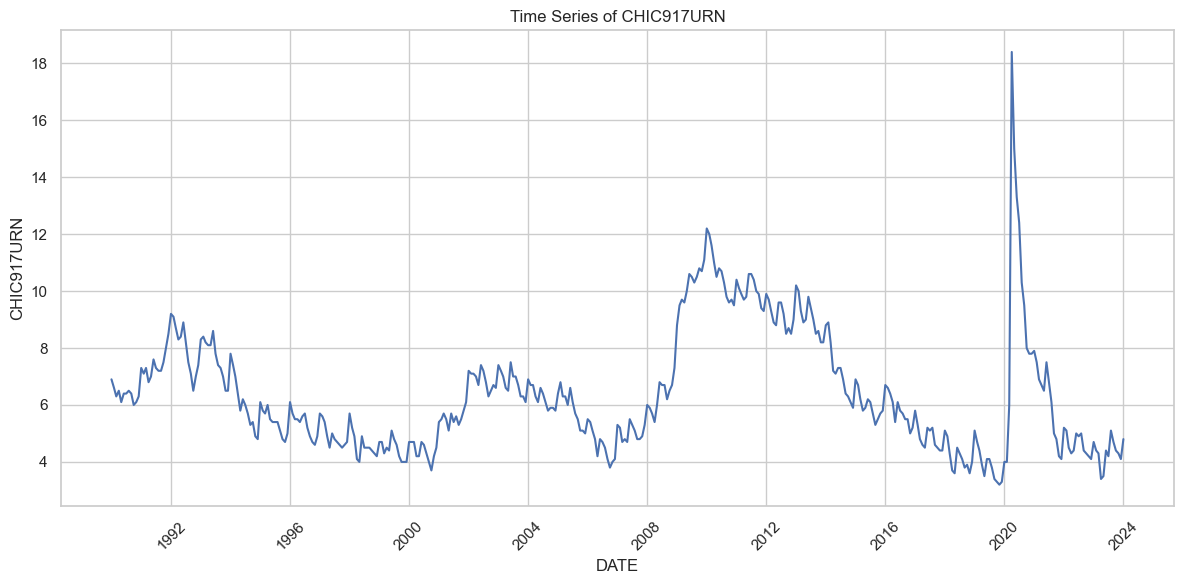

In [6]:
jobs['DATE'] = pd.to_datetime(jobs['DATE'])
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='DATE', y='CHIC917URN', data=jobs)
plt.title('Time Series of CHIC917URN')
plt.xlabel('DATE')
plt.ylabel('CHIC917URN')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [91]:
# code from Daisy:
crimes = pd.read_csv('Crimes.csv')
full_moon = pd.read_csv('full_moon.csv')
holidays = pd.read_csv('holidays.csv')
weather = pd.read_csv('weather.csv')
unemploy = pd.read_csv('CHIC917URN.csv')

weather['date'] = pd.to_datetime(weather['datetime'])
weather.drop(columns=['datetime'], inplace = True)

crimes['Date'] = pd.to_datetime(crimes.Date)
crimes['date'] = pd.to_datetime(pd.to_datetime(crimes['Date']).dt.date)
crimes['time'] = pd.to_datetime(crimes['Date']).dt.time
crimes['day_of_week'] = pd.to_datetime(crimes['date']).dt.day_of_week
crimes.drop(columns=['Date'], inplace=True)

full_moon['date'] = pd.to_datetime(full_moon.FullMoonDates)
full_moon.drop(columns=['FullMoonDates', 'Year'], inplace=True)
full_moon['full_moon'] = (pd.DataFrame({'full_moon': pd.Series(['full moon'] * len(full_moon))}))

holidays['date'] = pd.to_datetime(holidays.Date)
holidays.drop(columns = ['Date'], inplace=True)

unemploy['date'] = pd.to_datetime(unemploy['DATE'])
unemploy.drop(columns=['DATE'], inplace = True)

crime_count = pd.DataFrame(crimes['date'].value_counts().reset_index())

merged2 = pd.merge(crime_count, weather, on='date', how='left')
merged2 = pd.merge(merged2, full_moon, on='date', how = 'left')
merged2 = pd.merge(merged2, holidays, on='date', how = 'left')
merged2 = pd.merge(merged2, unemploy, on='date', how = 'left')

merged2 = merged2[merged2['date'].dt.year > 2009]
merged2 = merged2.sort_values(by = 'date')

merged2['CHIC917URN'] = merged2['CHIC917URN'].fillna(method='ffill')

merged2['day_of_week'] = pd.to_datetime(merged2['date']).dt.day_of_week
merged2['year'] = pd.to_datetime(merged2['date']).dt.year
merged2['month'] = pd.to_datetime(merged2['date']).dt.month

# X = merged2[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'humidity',
#              'precip', 'precipprob', 'precipcover', 'snow', 
#              'snowdepth', 'windgust', 'windspeed', 'winddir', 
#              'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 
#              'solarenergy', 'uvindex', 'severerisk', 
#              'moonphase', 'day_of_week', 'year', 'month', 'preciptype', #'sunrise', 'sunset', 
#              'conditions', 'full_moon', 'Holiday', 'CHIC917URN']]

# num_features = merged2[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'humidity',
#                         'precip', 'precipprob', 'precipcover', 'snow',
#                         'snowdepth', 'windgust', 'windspeed', 'winddir', 
#                         'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 
#                         'moonphase', 'day_of_week', 'year', 'month', 'CHIC917URN']]

# cat_features = merged2[['preciptype', 'conditions', 'full_moon', 'Holiday']]


cat_features = ['preciptype', 'conditions', 'full_moon', 'Holiday']
num_features = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'humidity',
                        'precip', 'precipprob', 'precipcover', 'snow',
                        'snowdepth', 'windgust', 'windspeed', 'winddir', 
                        'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 
                        'moonphase', 'day_of_week', 'year', 'month', 'CHIC917URN'
               ]





X = merged2[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'humidity',
                        'precip', 'precipprob', 'precipcover', 'snow',
                        'snowdepth', 'windgust', 'windspeed', 'winddir', 
                        'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 
                        'moonphase', 'day_of_week', 'year', 'month', 'CHIC917URN',
                        'preciptype', 'conditions', 'full_moon', 'Holiday']]




# cat_features = X.select_dtypes(include="object").columns
# num_features = X.select_dtypes(exclude="object").columns

y = list(merged2['count'])


In [92]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet # use CV or not?

from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.feature_selection import SelectPercentile, f_regression
import warnings

In [93]:
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

numeric = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler())])

categorical = Pipeline(steps=[('impute2', SimpleImputer(strategy='most_frequent')),
                     ('one_hot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
                     ('percent', SelectPercentile(f_regression, percentile=60))
                     ])

preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric, num_features),
        ("categorical", categorical, cat_features)
        ]
)


models = {
#     'Ridge': RidgeCV(alphas=np.logspace(-6,6,30), cv=10),  
#     'Lasso': LassoCV(cv=10),
#     'Elastic Net': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Ridge': Ridge(),  
    'Lasso': Lasso(),
    'Elastic Net': ElasticNet()
}

# Create a pipeline for each model
pipelines = {}
for model_name, model in models.items():
    pipelines[model_name] = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

# Fit and evaluate each pipeline
results = {}
for model_name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)  # Fit the pipeline
    y_pred = pipeline.predict(X_test)  # Make predictions
    mae = mean_absolute_error(y_test, y_pred)  # Calculate MAE
    results[model_name] = mae

# Print results
for model_name, mae in results.items():
    print(f"{model_name}: MAE = {mae}")


Ridge: MAE = 7.191591980185275
Lasso: MAE = 7.83358351321624
Elastic Net: MAE = 8.153378627311417


In [94]:
# With RIDGE

Rpipe = Pipeline([('preprocessor', preprocessor),
           ('model', Ridge())])
RPipe = Rpipe.fit(X_train, y_train)

ridge_model = Rpipe.named_steps['model']
preprocessor = Rpipe.named_steps['preprocessor']

feature_names = preprocessor.transformers_[0][2]
coefficients = ridge_model.coef_

coefficients_dict = dict(zip(feature_names, coefficients))
sorted_coefficients = sorted(coefficients_dict.items(), key=lambda x: np.abs(x[1]), reverse=True)
sorted_coefficients

# numeric coefficients

[('year', -9.380372277735338),
 ('tempmax', -3.870724611355523),
 ('temp', 2.5533167566929964),
 ('feelslike', 2.460051610936217),
 ('feelslikemax', 2.2013369604850808),
 ('CHIC917URN', -2.1366695828473388),
 ('precipprob', -2.1288472501099207),
 ('feelslikemin', 1.588803115026959),
 ('month', -1.4931430591096),
 ('tempmin', -1.47791871651097),
 ('solarenergy', 0.9794371454166424),
 ('precip', -0.798809526246213),
 ('solarradiation', -0.5771377970623601),
 ('precipcover', -0.5591752906382152),
 ('severerisk', -0.4938690469110696),
 ('humidity', 0.4625673052414016),
 ('visibility', 0.45083496960997116),
 ('snowdepth', -0.3611002053040348),
 ('snow', 0.30239875834298235),
 ('moonphase', 0.1846570355060161),
 ('day_of_week', -0.1559333503162335),
 ('uvindex', 0.06410060201794202),
 ('cloudcover', 0.05452563575728419),
 ('winddir', 0.0543519317192092),
 ('sealevelpressure', 0.038255606550925275),
 ('windspeed', -0.021963465372908875),
 ('windgust', -0.006425210127712662)]

In [95]:
feature_names = preprocessor.transformers_[1][2]
coefficients = ridge_model.coef_

coefficients_dict = dict(zip(feature_names, coefficients))
sorted_coefficients = sorted(coefficients_dict.items(), key=lambda x: np.abs(x[1]), reverse=True)
sorted_coefficients
# categorical features

[('preciptype', -3.870724611355523),
 ('full_moon', 2.5533167566929964),
 ('Holiday', 2.2013369604850808),
 ('conditions', -1.47791871651097)]

In [68]:
# With LASSO
Lpipe = Pipeline([('preprocessor', preprocessor),
           ('model', Lasso())])
LPipe = Lpipe.fit(X_train, y_train)

lasso_model = Lpipe.named_steps['model']
preprocessor = Lpipe.named_steps['preprocessor']

feature_names = preprocessor.transformers_[0][2]
coefficients = lasso_model.coef_

coefficients_dict = dict(zip(feature_names, coefficients))
sorted_coefficients = sorted(coefficients_dict.items(), key=lambda x: np.abs(x[1]), reverse=True)
sorted_coefficients
# numeric

[('year', -6.883930401828924),
 ('feelslike', 1.5110815557840984),
 ('solarenergy', 0.919597917848081),
 ('feelslikemin', 0.5138722601070388),
 ('tempmax', 0.0),
 ('tempmin', 0.0),
 ('temp', 0.0),
 ('feelslikemax', 0.0),
 ('humidity', -0.0),
 ('precip', -0.0),
 ('precipprob', -0.0),
 ('precipcover', -0.0),
 ('snow', -0.0),
 ('snowdepth', -0.0),
 ('windgust', -0.0),
 ('windspeed', -0.0),
 ('winddir', -0.0),
 ('sealevelpressure', -0.0),
 ('cloudcover', -0.0),
 ('visibility', 0.0),
 ('solarradiation', 0.0),
 ('uvindex', 0.0),
 ('severerisk', -0.0),
 ('moonphase', 0.0),
 ('day_of_week', -0.0),
 ('month', -0.0),
 ('CHIC917URN', -0.0)]

In [96]:
feature_names = preprocessor.transformers_[1][2]
coefficients = lasso_model.coef_

coefficients_dict = dict(zip(feature_names, coefficients))
sorted_coefficients = sorted(coefficients_dict.items(), key=lambda x: np.abs(x[1]), reverse=True)
sorted_coefficients
# categorical

[('preciptype', 0.0),
 ('conditions', 0.0),
 ('full_moon', 0.0),
 ('Holiday', 0.0)]

In [69]:
# With elastic net
ENpipe = Pipeline([('preprocessor', preprocessor),
           ('model', ElasticNet())])
ENPipe = ENpipe.fit(X_train, y_train)

en_model = ENpipe.named_steps['model']
preprocessor = ENpipe.named_steps['preprocessor']

feature_names = preprocessor.transformers_[0][2]
coefficients = en_model.coef_

coefficients_dict = dict(zip(feature_names, coefficients))
sorted_coefficients = sorted(coefficients_dict.items(), key=lambda x: np.abs(x[1]), reverse=True)
sorted_coefficients
# numeric

[('year', -4.647401503233153),
 ('solarenergy', 0.8263654617086482),
 ('solarradiation', 0.8207229968666849),
 ('feelslikemin', 0.39810462897915777),
 ('tempmin', 0.3434249324732359),
 ('feelslike', 0.33581098839269635),
 ('temp', 0.2795240670538381),
 ('feelslikemax', 0.26786750606369647),
 ('snowdepth', -0.23813746530735308),
 ('uvindex', 0.2066426100778976),
 ('tempmax', 0.17261230083937557),
 ('severerisk', -0.17148701543958983),
 ('CHIC917URN', 0.09223178890645563),
 ('precip', -0.06283955726250842),
 ('humidity', 0.0),
 ('precipprob', 0.0),
 ('precipcover', -0.0),
 ('snow', -0.0),
 ('windgust', -0.0),
 ('windspeed', -0.0),
 ('winddir', -0.0),
 ('sealevelpressure', -0.0),
 ('cloudcover', 0.0),
 ('visibility', 0.0),
 ('moonphase', 0.0),
 ('day_of_week', -0.0),
 ('month', -0.0)]

In [97]:
feature_names = preprocessor.transformers_[1][2]
coefficients = en_model.coef_

coefficients_dict = dict(zip(feature_names, coefficients))
sorted_coefficients = sorted(coefficients_dict.items(), key=lambda x: np.abs(x[1]), reverse=True)
sorted_coefficients
# categorical

[('conditions', 0.3434249324732359),
 ('full_moon', 0.2795240670538381),
 ('Holiday', 0.26786750606369647),
 ('preciptype', 0.17261230083937557)]

In [ ]:
# Most useful indicators: 
# year, feelslikemin, tempmax, temp

# somewhat useful:
# CHIC917URN, UV index, severerisk, solarradiation, 

# not useful indicators:
# moon phase, visibility, cloudcover, humidity, precipprob, precipcover, snow, windgust, 
# windspeed, winddir, sealevelpressure


# wasn't able to find other datasets that were are useful/easy to use

# are we trying to predict by location? filter to violent crimes by the area in which they can be committed?
# like look at the police district, because it might be more useful to split it by area?
# HOWEVER we are assuming the same weather/moon phases pattern for all of the city

# I didn't really include holidays in my model
# could see if the day being a holiday correlates with higher crime
# is there a seasonal element in the crime? - best looked at with SARIMA then

# Facebook Prophet, Exponential Smoothing, Year over Year, SARIMA


# more likely in hotter months, are holidays worse? new years is

<AxesSubplot: xlabel='DATE', ylabel='CHIC917URN'>

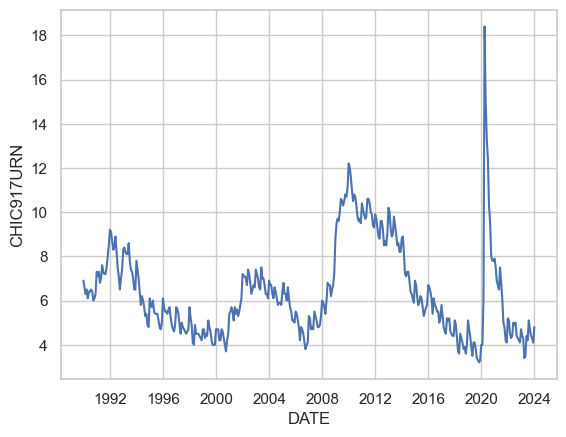

In [54]:
# make a plot of # of crimes per day by the date
sns.lineplot(x='DATE', y='CHIC917URN', data=jobs)

In [53]:
X_train

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,humidity,precip,precipprob,precipcover,...,day_of_week,year,month,preciptype,sunrise,sunset,conditions,full_moon,Holiday,CHIC917URN
4228,24.7,8.7,15.4,24.7,6.9,15.2,72.6,3.212,100.0,20.83,...,1,2010,4,rain,2010-04-06T06:24:51,2010-04-06T19:21:39,"Rain, Overcast",NaN,NaN,11.0
7500,16.5,10.7,12.9,16.5,10.7,12.9,61.7,0.327,100.0,4.17,...,5,2021,4,rain,2021-04-24T05:56:03,2021-04-24T19:41:54,"Rain, Overcast",NaN,NaN,6.7
7847,-7.0,-15.0,-10.6,-15.3,-24.3,-19.0,50.6,0.000,0.0,0.00,...,2,2014,12,NaN,2014-12-31T07:18:12,2014-12-31T16:29:09,Clear,NaN,New Year's Eve,5.9
6439,9.0,4.3,6.2,5.4,-0.8,2.1,75.5,0.000,0.0,0.00,...,6,2010,3,NaN,2010-03-14T07:04:01,2010-03-14T18:56:01,Overcast,NaN,NaN,11.6
4035,35.9,22.7,29.6,37.8,22.7,31.3,61.7,1.273,100.0,4.17,...,0,2012,7,rain,2012-07-02T05:19:59,2012-07-02T20:29:10,"Rain, Partially cloudy",NaN,NaN,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6736,30.2,13.9,23.1,28.6,13.9,22.6,44.4,0.000,0.0,0.00,...,3,2021,6,NaN,2021-06-03T05:16:58,2021-06-03T20:20:59,Partially cloudy,NaN,NaN,7.5
3509,23.0,18.5,20.7,23.0,18.5,20.7,79.9,11.280,100.0,29.17,...,1,2011,8,rain,2011-08-23T06:06:35,2011-08-23T19:39:03,"Rain, Partially cloudy",NaN,NaN,10.4
3744,18.9,9.7,14.8,18.9,8.7,14.7,63.9,0.000,0.0,0.00,...,0,2013,9,NaN,2013-09-23T06:39:10,2013-09-23T18:45:40,Partially cloudy,NaN,NaN,8.5
2327,12.3,1.5,4.9,12.3,-2.8,1.4,78.8,1.451,100.0,29.17,...,4,2014,3,rain,2014-03-28T06:40:01,2014-03-28T19:11:44,"Rain, Overcast",NaN,NaN,8.2


In [56]:
X.select_dtypes(include="object").columns

Index(['preciptype', 'sunrise', 'sunset', 'conditions', 'full_moon',
       'Holiday'],
      dtype='object')

In [55]:
X.select_dtypes(exclude="object").columns

Index(['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk', 'moonphase', 'day_of_week', 'year', 'month',
       'CHIC917URN'],
      dtype='object')

In [58]:
X['Holiday']

1969    New Year's Day
5731               NaN
6687               NaN
5531               NaN
5535               NaN
             ...      
6941               NaN
7815               NaN
7994               NaN
8271               NaN
7685               NaN
Name: Holiday, Length: 5168, dtype: object